# Algorithmes d'apprentissage

Au coeur de tous les algorithmes d'apprentissage présenté ici, il y a la matrice $Q_{s,a}$, qui est l'estimation relative (à l'algorithme) de chaque couple état-action. Plus la valeur du couple $(etat, action)$ est haute, plus elle est associé à un taux de réussite élevé, et pour un état donné (une ligne de la $Q_{s,a}$ ), la politique optimale associé choisira l'action ayant la valeur la plus haute.

On va ici distinguer deux familles d'algorithmes:
- d'une part la famille des algorithmes de Monte-Carlo, qui fonctionne dans un contexte épisodique, et qui a besoin d'un épisode complet mettre à jour la politique,
- d'autre part la famille des algorithme de Temporal Difference (TD), qui mette à jour al politique à chaque étape de l'épisode

## Methode(s) Monte-carlo

La méthode de **Monte-Carlo** (pour le *Reinforcement Learning*) est l'approche la plus "naïve" qu'on puisse avoir: pour évaluer la qualité d'un état, respectivement d'un couple état-action, on observe le "taux de réussite" de cet état, respectivement du couple état-action, après un épisode complet. 
 A l'issue de suffisement d'épisodes, on a une estimation relative de chaque état, ou couple état-action, à partir de laquelle on peut déduire une politique "optimale".

lien pertinent: https://towardsdatascience.com/monte-carlo-learning-b83f75233f92

**Remarques**:
- Comment faire lorsqu'on ne peut pas partir de chacun des états du système (comme c'est le cas dans *Frozen-Lake*)?
- D'une certaine manière, on "se fiche" de comment l'agent parcours les états, seul l'observation des trajectoires comptent
- Instinctivement, pour éviter de biaiser le parcours de l'agent, on peut utiliser une politique uniformément aléatoire (lors de la phase d'apprentissage)
- Avec le constat précédent, on peut simplement paramétrer un algoritme de Monte Carlo avec comme seul paramètre le nombre d'itération

In [ ]:
with open("src/V2/Algorithms/Monte_Carlo.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

## Temporal Difference (TD)

Contrairement aux algoritmes "Monte Carlo", les algorithmes TD mettent à jour leur politique à chaque étape de chaque épisode.

**Remarques:**
- J'ai trouvé beaucoup de contradiction dans les définitions de *on-policy* et *off-policy*, celles que j'ai utilisée sont la version de wikipedia (et découle de l'observation des méthodes de mise à jour)
- pour ces algorithmes, on aura typiquement 4 paramètres: le nombre d'itération, le facteur d'apprentissage $\alpha$, le facteur d'actualisation $\gamma$ et $\epsilon$ le facteur d'exporation de la politique $\epsilon$*-greedy*

### SARSA

L'algorithme **SARSA** tire son nom de sa méthode d'apprentissage, qui signifie *State-Action-Reward-State-Action*: à chaque pas de l'algorithme, c'est à dire à chaque fois qu'un agent choisi une action, on va mettre à jour la matrice $Q_{s, a}$ en fonction de l'était de départ, l'action choisi par la politique, la récompense fournit par l'environnement, mais également l'action suivante à l'état suivant choisi par la politique en cours. L'amélioration de $Q_{s, a}$ peut donc s'écrire comme la fonction suivante: $update\_SARSA(State_n, Action_n, Reward_n, State_{n+1}, Action_{n+1})$.

Puisque que la fonction d'amélioration dépend de l'action $Action_{n+1}$, elle même déterminée par la politique en cours, on dit qu'il s'agit d'un algorithme *on-policy*.

In [ ]:
with open("src/V2/Algorithms/SARSA.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

### Q-learning

L'algorithme **Q_learning** ressemble beaucoup à l'algorithme **SARSA**: comme lui il va mettre à jour la matrice $Q_{s, a}$ à chaque pas (*step*) de chaque épisode. L'amélioration de $Q_{s, a}$ peut s'écrire comme la fonction suivante: $update\_Qlearning(State_n, Action_n, Reward_n, State_{n+1})$.

Contrairement à la fonction d'almélioration de **SARSA**, on voit que celle de **Q_learning** ne dépend pas de l'action $Action_{n+1}$: elle ne dépend donc pas de la politique utilisé, et on parlera alors d'un algorithme *off-policy*.

In [ ]:
with open("src/V2/Algorithms/Q_learning.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

# Comparaisons, convergence et métrique

Les temps de calcul des algorithmes seront potentiellement "long", on voudrait alors savoir quand s'arrêter avec un résultat (*i.e* une politique optimale estimée) qui soit *aussi bonne que possible*. Avant de se lancer dans une longue période d'apprentissage, on aimerait choisir judicieusement les paramètres de notre algorithme par exemple.

**Remarques:**
- La lecture de littérature sur le sujet peut donner une bonne idée de paramètres "non-déconnants", ou d'une plage de valeur pertinente
- Ici, j'aurai une approche naïve, et je choisirais ces paramètres uniquement via l'exploitation des algorithmes précédents

## Grille

Pour essayer de se faire une idée du comportement de chaque algorithme en fonction de ses paramètres, l'approche "naïve" est de faire une grille sur l'espace des paramètres. Les valeurs possibles pour $\alpha$, $\gamma$ et $\epsilon$ sont toutes dans l'intervalle $[0, 1]$, et les valeurs pour le nombre d'estimation sont les entiers positifs.

In [ ]:
with open("parameter_grid.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

**Remarque:** Effectuer les calculs pour toute la grille prend du temps => on sauvegarde à chaque nouveau modèle testé les résultats dans un fichier.

## Comparaison

L'approche la plus naïve et direct pour comparer les réusltats lors de la phase d'apprentissage sont les résultats obtenue lors de la phase de test correspondante avec les paramètres appris (ici, ce sera toujours la matrice $Q_{s, a}$).

Les objectifs de ces comparaisons sont multiples: quel jeux de paramètres choisir pour optimiser la convergence vers la **meilleur** matrice $Q_{s, a}$ ? Comment savoir si on a suffisement appris ? Quelle est la sensibilité de notre algorithme aux paramètres ? Quel algorithme choisir pour notre problème ?

**Attention:** Il est facile de commettre l'erreur d'évaluer notre méthode en se basant sur la politique d'apprentissage. Il faut en effet l'évaluer lors d'une phase de test sur la politique **optimal**, ici déterministe, qui sera construite *a priori* avec la matrice $Q_{s, a}$. Pour concrétiser la différence entre les deux: si je mettrais un paramètre $\epsilon = 1$, est ce qu'on verrait une quelconque amélioration si on testerais cette même politique ? N'ai je "rien appris" pour autant ?

### Monte-Carlo

L'algorithme d'apprentissage de Monte-Carlo implémenté est très simpliste, et peut largement être amélioré. Le seul paramètre de l'algoirthme est ici le nombre d'étape lors de la phase d'apprentissage, et le graphique suivant illustre l'évolution du taux de réussite lors de la phase de test en fonction de ce nombre d'étape.



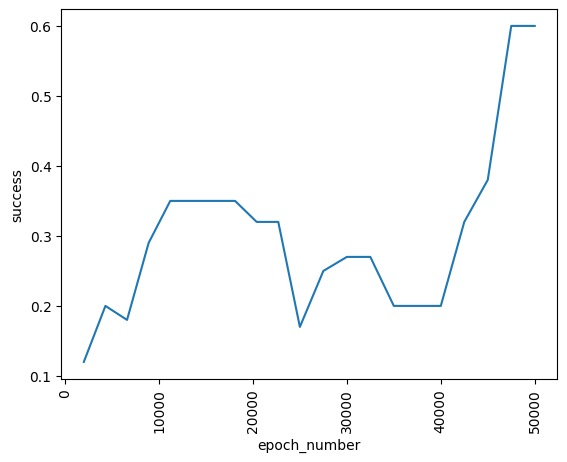

In [35]:
import json
import pandas as pd
import seaborn
results = []

with open("data/mc_grid_final.json", 'r') as the_file:
    results += json.loads(the_file.read())
                          
big_df = pd.DataFrame(results)
seaborn.lineplot(big_df, x = "epoch_number", y= "success").tick_params(axis='x', rotation=90)

On observe que l'algorithme **semble converger** vers un taux de réussite de 0.6, mais qu'il lui faut "beaucoups" de d'itération. En optimisant la politique d'apprentissage, on pourrait certainement gagner un temps "considérable".

**Remarque:** Il n'y a qu'une seule observation par valeur du paramètre **epoch_number**, mais cette valeur est le taux de réussite sur 100 test. On pourrait augmenter la taille de l'échantillon de test si on voulait être un peu plus "sur" de la valeur retourner, mais...

**Rappel:** Lors de chaque phase de test, l'aléatoire est remis à zéros, donc on observe bien la manière dont se comporte la politique final (= de test) **en faisant abstraction du hasard intrinsèque**.

### Algorithmes DT

Les algorithmes SARSA et Q-learning étant tous les deux de la même catégorie, avec les mêmes jeux de paramètres, on peut effectuer la comparaison entre eux, et utiliser une grille de paramètres communes. Cela peut permettre par exemple de décider quel algorithme utiliser entre les deux.



In [37]:
results = []

with open("data/fat_grid_2.json", 'r') as the_file:
    results += json.loads(the_file.read())
                          
big_df = pd.DataFrame(results)
print(big_df)

       algorithm  success  epoch_number  epsilon  alpha     gamma  \
0          SARSA     0.08        2000.0     0.50   0.10  0.800000   
1     Q_learning     0.18        2000.0     0.50   0.10  0.800000   
2          SARSA     0.13        2000.0     0.50   0.10  0.825714   
3     Q_learning     0.22        2000.0     0.50   0.10  0.825714   
4          SARSA     0.22        2000.0     0.50   0.10  0.851429   
...          ...      ...           ...      ...    ...       ...   
8187  Q_learning     0.08        8000.0     0.98   0.98  0.928571   
8188       SARSA     0.33        8000.0     0.98   0.98  0.954286   
8189  Q_learning     0.08        8000.0     0.98   0.98  0.954286   
8190       SARSA     0.14        8000.0     0.98   0.98  0.980000   
8191  Q_learning     0.08        8000.0     0.98   0.98  0.980000   

                                                   q_sa  
0     [[0.004866050347305372, 0.004785138234355717, ...  
1     [[0.010236405259126497, 0.009669868145180921, ...

Contrairement à la méthode de Monte Carlo étudié précedemment, on a ici 4 paramètres a testé/évalué/comprendre. Dans un premier temps, on peut réaliser une approche **univarié**, c'est à dire regarder l'impact du taux de réussite en faisant varier un seul parmètre.

En amalgamant sur l'ensemble des autres paramètres, on peut tracer le graphique d'une *violinplot* de l'évolution du taux de réussite en fonction du paramètre d'intérêt.

**Remarque:** Une *violinplot* est la combinsaison d'une boîte à moustache, qui représente la distribution "synthétique" d'une variable par rapport à une autre, et de la densité par rapport à cette même variable. Ainsi la point blanc centrale représente la médiane, et les barres délimitent les quartiles de la distribution, les points à l'extérieur étant supposé des *outliers* (foncièrement faux dans notre cas, car le taux de succès n'est pas une variable observée sur laquelle on pourrait faire une erreur de mesure). Ce dernier comportement à propos des *outliers* n'est pas forcément satisfaisant pour l'analyse, et se comporte différement sur d'autre programme d'analyse statstique, comme **R**. 

Pour le nombre d'*epoch* lors de l'apprentissage:

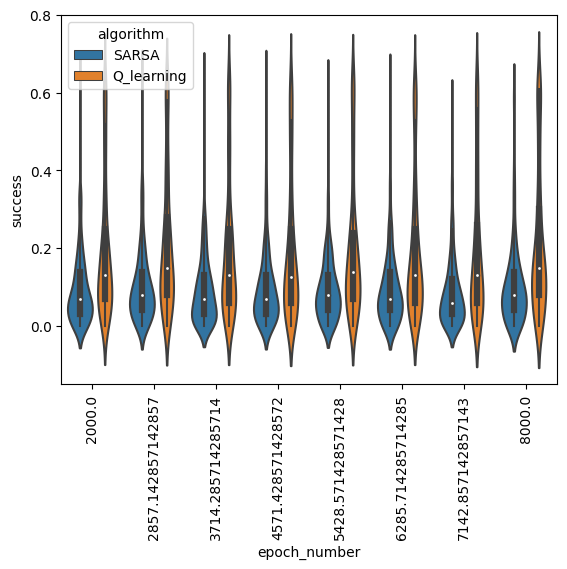

In [38]:
seaborn.violinplot(data=big_df, x="epoch_number", y="success", hue="algorithm").tick_params(axis='x', rotation=90)

On remarque:
 - Q-learning semble systématiquement avoir de meilleur résultats que SARSA
 - le paramètre du nombre d'*epoch* ne parait pas très significatif, en tout cas sur la plage de valeurs observé (entre 2000 et 8000). Des tests statistiques plus approfondies pourraient déterminer si tel est le cas, ou non.

 Pour le paramètre $\epsilon$:

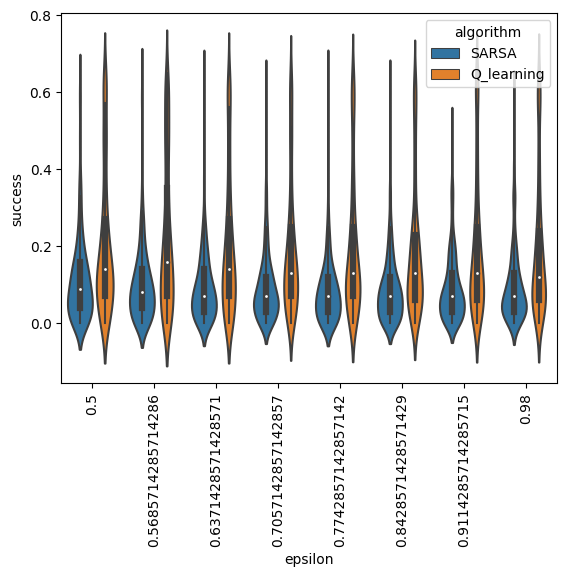

In [39]:
seaborn.violinplot(big_df, x = "epsilon", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

On remarque:
 - Q-learning semble systématiquement avoir de meilleur résultats que SARSA
 - le paramètre $\epsilon$ ne parait pas très significatif (dit autrement, l'algorithme ne semble pas très sensible au paramètre), en tout cas sur la plage de valeurs observés (entre 0.5 et 0.98). Des tests statistiques plus approfondies pourraient déterminer si tel est le cas, ou non.

 Pour le paramètre $\alpha$:

In [ ]:
seaborn.violinplot(big_df, x = "alpha", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

On remarque:
- Q_learning est systématiquement sensiblement meilleur que SARSA
- Le taux de succès des algorithmes semble négativement corrélé  au paramètre $\alpha$
- Une valeur basse est donc meilleur qu'une valeur haute

On pourrait faire une grille autour de 0.1 pour essayer de trouver une valeur encore meilleur que 0.1.

Pour le paramètre $\gamma$: 

In [ ]:
seaborn.violinplot(big_df, x = "gamma", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

On remarque:
- Q_learning est systématiquement meilleur que SARSA
- Le taux de succès des algorithmes semble positivement corrélé  au paramètre $\gamma$
- Une valeur haute est donc bien meilleur qu'une valeur haute

On pourrait faire une grille autour de 0.98 pour essayer de trouver une valeur encore meilleur que 0.98.

# Convergence

L'étude précédente met en avant un fait "inquiétant": le nombre d'épisode lors de l'apprentissage ne semble pas positivement corrélé avec un meilleur taux de succès. 

Dit autrement, on ne voit pas de convergence: lors d'une première phase d'exploration, si le taux de succès lors du test ne nous convient pas, on peut relancer l'algorithme ou le prolonger: comment alors autamtiser cette tâche ?


Pour illustrer le propos précédent, le graphique suivant représentent *n = 10* trajectoires (parmis les meilleurs) avec un jeu de paramètre fixe (l'algorithme, $\alpha, \gamma, \epsilon$) en fonction de la durée d'apprentissage.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results.sort(reverse=True, key = lambda element: element["success"])
trajectory_number = 10

big_df = pd.DataFrame(results)
target_df = pd.DataFrame()
target_list = []
sub_df = big_df[['alpha', 'gamma', 'algorithm', 'epsilon', 'success', 'epoch_number']]
# See https://stackoverflow.com/a/60909312
# On aggrège les trajectoire en fixant tous les paramètres sauf le nombre d'épisodes
cols = ['algorithm', 'alpha', 'gamma', 'epsilon']
for k, d in sub_df.drop(cols, axis=1).groupby([sub_df[c] for c in cols]):
    out = d
    out["algorithm"] = k[0]
    out["param"] = ",".join([str(i) for i in k])
    out.sort_values("epoch_number", ascending = True, inplace = True)
    target_list.append(out)
fig, ax = plt.subplots()
for line in target_list[0:trajectory_number]:
    seaborn.lineplot(line, x='epoch_number', y='success', hue='algorithm', ax = ax)
plt.show()

On voit que les trajectoires n'atteignent pas forcément leur point le plus haut avec un nombre d'épisodes plus élevés. Il faut également rappellé que le hasard n'y est *pour rien*: on a fixé la graine au début de chaque apprentissage, et de chaque test.

Cela signifie par exemple que la première trajectoire, qui débute avec un taux de réussite inférieur à 0.1, atteint son taux de réussite record de 0.61 entre 3000 et 4000 épisodes d'apprentissages, sur la même séquence d'aléatoire lors du test, pour le voir chuter à environ 0.15 moins de 1000 épisodes d'apprentissages plus loin.


La question est alors quand s'arrêter, afin d'être **certain** d'avoir un bon apprentissage ?

## Critère de convergence

Pour se rendre compte d'une convergence, on va observer une statistique, ou un objet mathématique, qui semble se stabiliser. Une approche naïve, et valide, est d'observer le taux de réussite **de la politique apprise** lors d'une séquence d'épisodes de test. Bien qu'il n'y ai aucune raison que ça ne fonctionne pas, cela semble extrèmement lent: en effet, si l'on souhaite tester selon ce critère lors de chaque épisode d'apprentissage, avec 100 épisodes de test (par exemple) pour tester la convergence, on multiplie grossièrement par 101 le temps d'apprentissage.

La méthode que je propose ici est de directement regarder la forme de la matrice $Q_{s, a}$ lors de chaque itération, pour déterminer si les caractéristiques génératrices de la politique déterministe correspondante évolue. Ce calcul est rapide, et peut donc être effectuer "gratuitement" à la fin de chaque épisode d'apprentissage.

Les algorithmes suivants sont des variations de leurs précédentes implémentation, où l'on a arbitrairement choisi a 100 le nombre d'épisode consécutifs nécessaire à la convergeance de la politique apprise: si la matrice $Q_{s, a}$ ne change pas "de forme" pendant 100 épisodes, après un temps de chauffe, on considère que la solution est "stable", et on testera cette solution.

In [ ]:
with open("src/V2/Algorithms/Monte_Carlo_controlled.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

**Remarque:** Je ne m'attarderais pas sur cette version "améliorée" de Monte-Carlo, car l'algorithme est beaucoup trop lent, et je n'ai pas encore diagnostiqué les raisons. 

In [ ]:
with open("src/V2/Algorithms/Q_learning_controlled.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

In [ ]:
with open("src/V2/Algorithms/SARSA_controlled.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

### Comparaison de la convergence entre SARSA et Q-learning

Avec le critère de convergence arbitraire énnoncé plus haut, on va comparer le temps et le nombre d'epoch nécessaire à l'obtention de notre meilleur politique apprise. On en profitera pour regarder la fiablité de la méthode. 

Le code suivant effectue la comparaison sur la base de 10 simulations.

In [1]:
import gymnasium as gym
import time
import pandas as pd
import seaborn
from src.V2.Algorithms.SARSA_controlled import SARSA
from src.V2.Algorithms.Q_learning_controlled import Q_learning
from src.V2.Classes.Policy import Policy as Policy_V2
from src.V2.Classes.Agent import Agent
from src.V2.Functions.run import run_static


results = []

options = {
    "warmup_epoch": 3000,
    "maximum_epoch": 150000,
    "epsilon": 0.2,
    "alpha": 0.1,
    "gamma": 0.99
}

desc=["SFFF", "FHFH", "FFFH", "HFFG"] # Same as the map called "4*4"

environment = gym.make('FrozenLake-v1', desc=desc, is_slippery=True, render_mode="rgb_array")

def test(q_sa, test_epoch = 100):
    deterministic_policy = Policy_V2.buildOptimalPolicyFrom(q_sa)
    success = 0
    test_agent_v1 = Agent(deterministic_policy, initial_state_index = 0)
    for epoch in range(test_epoch):
        run_static(environment, test_agent_v1)
        success += test_agent_v1.current_state_index == (environment.observation_space.n - 1)  # type: ignore
    return success

for iteration in range(10):
    before_SARSA = time.time()
    learning = SARSA(environment, **options)
    after_SARSA = time.time()
    results.append({
        "algorithm": "SARSA",
        "success": test(learning["Q_sa"]),
        "total_epoch": learning["total_epoch"],
        "converged": learning["convergence_attained"],
        "duration": after_SARSA - before_SARSA
    })

    before_Q_learning = time.time()
    learning = Q_learning(environment, **options)
    after_Q_learning = time.time()
    results.append({
        "algorithm": "Q_learning",
        "success": test(learning["Q_sa"]),
        "total_epoch": learning["total_epoch"],
        "converged": learning["convergence_attained"],
        "duration": after_Q_learning - before_Q_learning
    })



dataframe = pd.DataFrame(results)

print(dataframe)

c:\Users\Zongo\miniconda3\envs\reinforcment-learning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Zongo\miniconda3\envs\reinforcment-learning\lib\site-packages\gymnasium\utils\passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Le premier graphique est un boxplot du succès, c'est à dire qu'on va esquisser la distribution des succès en fonction de l'algorithme, en exposant les valeurs extrème et les quartiles/médiane.

<AxesSubplot: xlabel='algorithm', ylabel='success'>

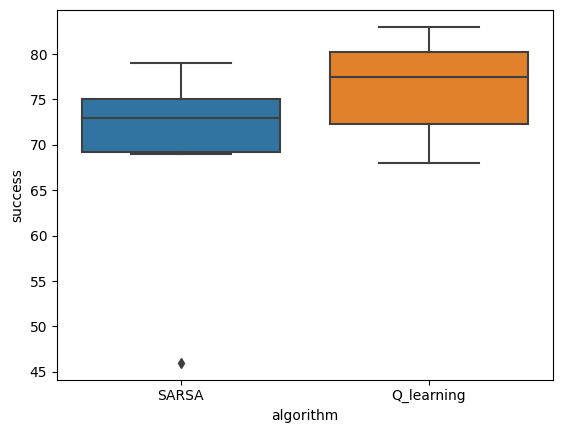

In [16]:
seaborn.boxplot(dataframe, y= "success", x='algorithm')


 La encore, Q_learning semble à la fois meilleur et plus "stable". En effet le coeur de la distribution et la médiane sont plus haut pour Q_learning, et on remarque qu'il y a une valeur "extrème" pour SARSA de 46% de succès, ce qui indique une mauvaise solution. On pourrait penser qu'il s'agit là d'un simple effet du hasard, mais je vous encourage à le tester vous même (pour des raisons de temps et de présentation, je n'ai fait que 10 runs de chaque algorithmes).

 De manière analogue, on peut esquisser le nombre d'épisode jusqu'à la convergence, pour chaque algorithme.

Correlation between epoch number and duration in seconds is 0.9996273134975244
SARSA is 5.121236391682241 slower (on average) than Q-learning


<AxesSubplot: xlabel='algorithm', ylabel='total_epoch'>

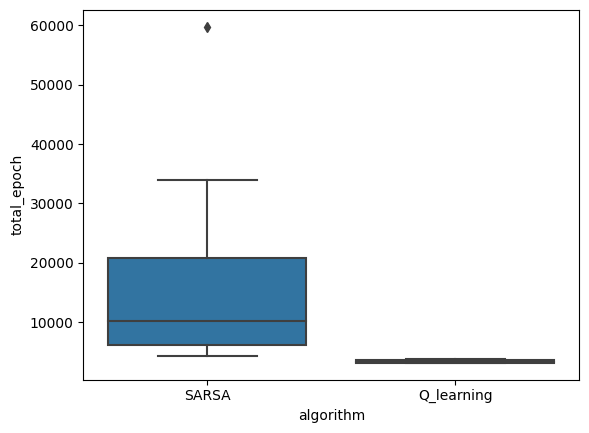

In [33]:
import statistics

correlation = dataframe["total_epoch"].corr(dataframe["duration"])
times_slower = dataframe.loc[dataframe["algorithm"] == "SARSA", "total_epoch"].mean() / dataframe.loc[dataframe["algorithm"] == "Q_learning", "total_epoch"].mean()
print("Correlation between epoch number and duration in seconds is " + str(correlation))
print("SARSA is " + str(times_slower) + " slower (on average) than Q-learning")
seaborn.boxplot(dataframe, y= "total_epoch", x='algorithm')


On voit ici que SARSA est beaucoup plus variable dans la durée qu'il met jusqu'à la convergence, et aussi beaucoup plus long. La encore, Q learning est un gagnant clair. J'ai choisi de représenté le nombre total d'épisode plutot que le temps machine, mais les deux représentent la même chose ici: ils sont très fortement positivement corrélé.

Le graphique suivant est un "histogramme pairé" du nombre d'épisode en abscisse et du taux de réussite en ordonnée. Il combine les deux graphiques précédent en en faisant la synthèse.

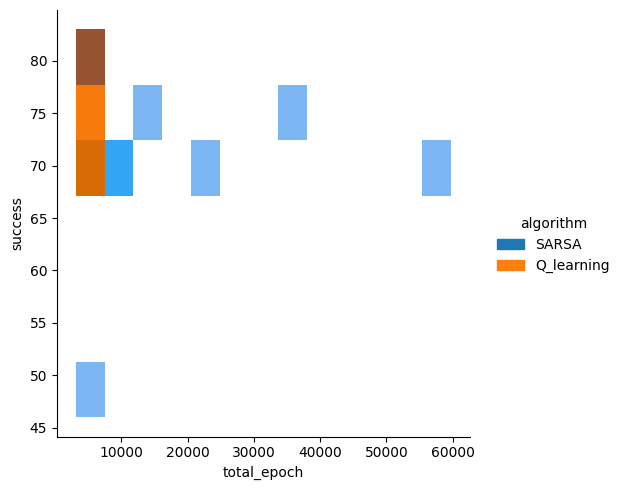

In [34]:
seaborn.displot(dataframe, y= "success", x='total_epoch', hue = "algorithm")

On voit ici que Q-learning est à la fois beaucoup plus rapide, et meilleur, avec plus de densité (une couleur plus sombre) dans les meilleurs résultats (en plus de n'avoir aucun mauvais résultat).

### $\epsilon$*-decay*

On a vu que les algorithmes précédents utilisent lors de l'apprentissage une politique $\epsilon$*-greedy*, et que le paramètre $\epsilon$ ne semblait pas avoir une importance majeure dans les résultats de l'algorithme. En réponse à ce constat, et sur les notions de convergence précédemment évoqués, on a "empiriquement" (je n'ai pas trouvé de preuve historique mathématique du gain de ce fonctionnement, peut être existe-t-elle quelque part cependant) modifié la politique $\epsilon$*-greedy* afin d'avoir un meilleur comportement.

L'algorithme suivant utilise un $\epsilon$*-decay* sur un algorithme de Q-learning: je me suis concentré sur celui-ci, car il parit évident maintenant qu'il est à la fois meilleur, et bien plus rapide.

Voici son implémentation:

In [40]:
with open("src/V2/Algorithms/Q_learning_decay.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

import gymnasium as gym
import numpy as np
from nptyping import Float, NDArray, Shape

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.epsilon_greedy_policy_factory import make_epsilon_greedy_policy

def Q_learning(environment, epsilon_decay = 0.01, alpha = 0.1, gamma = 0.99, epoch_number = 5000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))


    def update_Qlearning(agent: Agent, state_index, action_index, next_state, reward: float = 0):
        # Q[s, a] := Q[s, a] + α[r + γ . argmax_a {Q(s', a')} - Q(s, a)]
        best_next_action = np.argmax(Q_sa[next_state, ])
        Q_sa[state_index, action_index] = Q_sa[state_index, action_index] + alpha * (reward + gamma * Q_sa[next_state, best_next_action] - Q_

On remarque que à la place de régler avec un paramètre le taux $\epsilon$, on précise son taux de dégradation.

Comment l'algorithme se compotre vis à vis de ce paramètre ? Est il aussi "insensible" au $\epsilon$*-decay* qu'il ne l'est pour le $\epsilon$ ?

J'effectuerai les comparaisons entre elles (avec plusieurs valeurs de $\epsilon$*-decay*) en parallèle de la méthode avec "contrôle de convergence" précédemment exposé.

In [44]:
from src.V2.Algorithms.Q_learning_controlled import Q_learning as Q_controlled
from src.V2.Algorithms.Q_learning_decay import Q_learning as Q_decay


results = []

options_controlled = {
    "warmup_epoch": 3000,
    "maximum_epoch": 150000,
    "epsilon": 0.2,
    "alpha": 0.1,
    "gamma": 0.99
}

options_decay = {
    "epoch_number": 5000,
    "alpha": 0.1,
    "gamma": 0.99
}

for iteration in range(10):
    before = time.time()
    learning = Q_controlled(environment, **options_controlled)
    after = time.time()
    results.append({
        "algorithm": "Q_controlled",
        "success": test(learning["Q_sa"]),
        "duration": after_Q_learning - before_Q_learning
    })
    for epsilon_decay in [0.1, 0.05, 0.01, 0.005, 0.001]:
        before = time.time()
        q_sa = Q_decay(environment, **options_decay, epsilon_decay = epsilon_decay)
        after = time.time()
        results.append({
            "algorithm": "Q_decay",
            "success": test(q_sa),
            "epsilon-decay": epsilon_decay,
            "duration": after - before
        })


In [45]:
dataframe = pd.DataFrame(results)
print(dataframe)

       algorithm  success  duration
0   Q_controlled       68  0.920736
1        Q_decay       10  0.619248
2        Q_decay        0  0.365642
3        Q_decay       21  1.110746
4        Q_decay       55  2.045974
5        Q_decay       70  1.444757
6   Q_controlled       70  0.920736
7        Q_decay        4  0.480103
8        Q_decay        9  0.634514
9        Q_decay       28  0.796670
10       Q_decay       75  1.715850
11       Q_decay       81  1.628814
12  Q_controlled       78  0.920736
13       Q_decay       19  0.655577
14       Q_decay        8  0.485325
15       Q_decay        1  0.501168
16       Q_decay       45  1.471948
17       Q_decay       75  1.578349
18  Q_controlled       71  0.920736
19       Q_decay        3  0.322174
20       Q_decay        6  0.343664
21       Q_decay       20  1.540658
22       Q_decay       49  1.493355
23       Q_decay       78  1.584518
24  Q_controlled       71  0.920736
25       Q_decay        1  0.566263
26       Q_decay        2  0